# Week 3 Prediction

According to our last prediction, Apple will increase for a few days and then begin to fall. The price did go up after i invested apple, but the pricr right now begins to fall so dicede to sell the apple.
In our last week prediction, the price of Amazon would decrease, so I shorted the stocks and the price did fall. The current price is more than a hundred dollars lower than my purchase price, which means i am making profit by shorting it.
Our current price of AMD and NVDA is less than our purchase price，which means these two stocks are losing money，so in this week perdiction，i am going to use LSTM to predict these two stocks in order to decide if we need to see the stocks.


## AMD
I used 5 years of AMD's historical data to build the model.

In [62]:
import pandas as pd
AMD = pd.read_csv('AMD2.csv')
AMD

,Date,Close/Last,Volume,Open,High,Low
0,12/5/16,8.68,31381360,8.69,8.71,8.45
1,12/6/16,9.45,92134400,8.95,9.54,8.82
2,12/7/16,9.56,54850990,9.65,9.79,9.24
3,12/8/16,10.34,104504900,9.90,10.66,9.80
4,12/9/16,10.34,60536690,10.38,10.54,9.87
...,...,...,...,...,...,...
1253,11/26/21,154.81,36245070,155.80,158.10,152.81
1254,11/29/21,161.91,57438870,157.50,162.51,156.10
1255,11/30/21,158.37,75182550,163.28,164.46,155.68
1256,12/1/21,149.11,64185120,160.37,160.88,148.92


In [63]:
y = AMD.reset_index()['Close/Last']

Text(0, 0.5, 'AMD Stock Price')

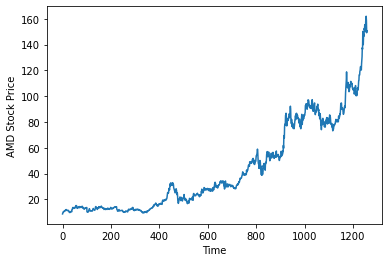

In [64]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('AMD Stock Price')

This is the price of AMD from 12/5/16 to 12/2/21

In [65]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [66]:
training_size = int(len(y)*0.65)
test_size = len(y) - training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [67]:
len(train_data),len(test_data)

(817, 441)

In [68]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [69]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [70]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [72]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [74]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 219ms/step - loss: 9.2897e-05 - val_loss: 0.0027
Epoch 2/100
12/12 [==============================] - 2s 204ms/step - loss: 7.7145e-05 - val_loss: 9.2410e-04
Epoch 3/100
12/12 [==============================] - 2s 209ms/step - loss: 7.0887e-05 - val_loss: 0.0018
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 6.0484e-05 - val_loss: 0.0010
Epoch 5/100
12/12 [==============================] - 2s 192ms/step - loss: 6.2361e-05 - val_loss: 0.0023
Epoch 6/100
12/12 [==============================] - 2s 201ms/step - loss: 6.9153e-05 - val_loss: 7.8038e-04
Epoch 7/100
12/12 [==============================] - 2s 214ms/step - loss: 7.1222e-05 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 2s 165ms/step - loss: 6.0999e-05 - val_loss: 0.0017
Epoch 9/100
12/12 [==============================] - 2s 165ms/step - loss: 6.7665e-05 - val_loss: 0.0013
Epoch 10/100
12/12 [===========================

12/12 [==============================] - 1s 108ms/step - loss: 3.9139e-05 - val_loss: 6.0367e-04
Epoch 78/100
12/12 [==============================] - 1s 114ms/step - loss: 4.3458e-05 - val_loss: 0.0015
Epoch 79/100
12/12 [==============================] - 1s 124ms/step - loss: 4.0562e-05 - val_loss: 7.7214e-04
Epoch 80/100
12/12 [==============================] - 1s 113ms/step - loss: 3.5723e-05 - val_loss: 0.0016
Epoch 81/100
12/12 [==============================] - 1s 115ms/step - loss: 3.6490e-05 - val_loss: 0.0010
Epoch 82/100
12/12 [==============================] - 1s 117ms/step - loss: 3.9788e-05 - val_loss: 0.0013
Epoch 83/100
12/12 [==============================] - 2s 143ms/step - loss: 3.9743e-05 - val_loss: 6.4195e-04
Epoch 84/100
12/12 [==============================] - 2s 161ms/step - loss: 3.8520e-05 - val_loss: 8.6231e-04
Epoch 85/100
12/12 [==============================] - 2s 171ms/step - loss: 3.5844e-05 - val_loss: 6.4431e-04
Epoch 86/100
12/12 [===================

In [75]:
import tensorflow as tf

In [76]:
tf.__version__

'2.7.0'

In [77]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [78]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [79]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.201859675477504

In [80]:
math.sqrt(mean_squared_error(ytest,test_predict))

92.32265374435218

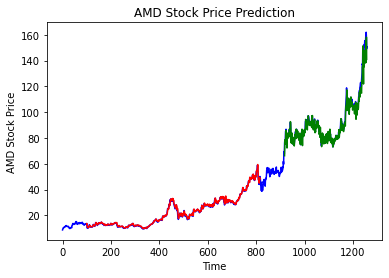

In [81]:
look_back=100
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
plt.plot(scaler.inverse_transform(y), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot, color = 'green', label = 'Test Predict Price')
plt.title('AMD Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('AMD Stock Price')
plt.show()

So the bule line is the actual stock price of AMD, the red line is the training predict price and the green one is the testing predict price, we can see the preiction and the real value are really close so it looks like the model is pretty decent.

In [82]:
len(test_data)

441

In [83]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [84]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [85]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.89618117]
101
1 day input [0.51067023 0.50388305 0.50838609 0.51184494 0.52685505 0.5386021
 0.54473667 0.54258305 0.5374274  0.58245774 0.61521895 0.63636364
 0.65228741 0.67793513 0.71846244 0.67656464 0.66194609 0.64543497
 0.63825622 0.64608758 0.63838674 0.66481759 0.64478235 0.64530444
 0.61841676 0.62011355 0.62631339 0.65320107 0.6458918  0.65013379
 0.64341186 0.67036481 0.66984272 0.66592704 0.66116296 0.65600731
 0.66070613 0.655681   0.63623311 0.63610259 0.62990276 0.62729231
 0.63336161 0.63251322 0.63655942 0.62128826 0.60608236 0.61437055
 0.62455133 0.63610259 0.63381844 0.64922013 0.60588658 0.598251
 0.61489265 0.61195588 0.59818573 0.60777916 0.61972199 0.63806043
 0.6289891  0.62650917 0.62885858 0.65574626 0.67421523 0.67506363
 0.70319128 0.70253867 0.70293024 0.72211708 0.72531489 0.74189127
 0.74561117 0.74136918 0.73405991 0.7279906  0.76062129 0.77628402
 0.79520982 0.84069699 0.83312667 0.92331789 0.91522548 0.85616394
 0.89623442 0.90850356 0.89936696 0.

8 day output [[0.8268945]]
9 day input [0.5374274  0.58245774 0.61521895 0.63636364 0.65228741 0.67793513
 0.71846244 0.67656464 0.66194609 0.64543497 0.63825622 0.64608758
 0.63838674 0.66481759 0.64478235 0.64530444 0.61841676 0.62011355
 0.62631339 0.65320107 0.6458918  0.65013379 0.64341186 0.67036481
 0.66984272 0.66592704 0.66116296 0.65600731 0.66070613 0.655681
 0.63623311 0.63610259 0.62990276 0.62729231 0.63336161 0.63251322
 0.63655942 0.62128826 0.60608236 0.61437055 0.62455133 0.63610259
 0.63381844 0.64922013 0.60588658 0.598251   0.61489265 0.61195588
 0.59818573 0.60777916 0.61972199 0.63806043 0.6289891  0.62650917
 0.62885858 0.65574626 0.67421523 0.67506363 0.70319128 0.70253867
 0.70293024 0.72211708 0.72531489 0.74189127 0.74561117 0.74136918
 0.73405991 0.7279906  0.76062129 0.77628402 0.79520982 0.84069699
 0.83312667 0.92331789 0.91522548 0.85616394 0.89623442 0.90850356
 0.89936696 0.93826274 0.93101873 0.95503491 0.95758011 0.93871957
 0.92175162 0.97317758 0.

16 day output [[0.4338928]]
17 day input [0.66194609 0.64543497 0.63825622 0.64608758 0.63838674 0.66481759
 0.64478235 0.64530444 0.61841676 0.62011355 0.62631339 0.65320107
 0.6458918  0.65013379 0.64341186 0.67036481 0.66984272 0.66592704
 0.66116296 0.65600731 0.66070613 0.655681   0.63623311 0.63610259
 0.62990276 0.62729231 0.63336161 0.63251322 0.63655942 0.62128826
 0.60608236 0.61437055 0.62455133 0.63610259 0.63381844 0.64922013
 0.60588658 0.598251   0.61489265 0.61195588 0.59818573 0.60777916
 0.61972199 0.63806043 0.6289891  0.62650917 0.62885858 0.65574626
 0.67421523 0.67506363 0.70319128 0.70253867 0.70293024 0.72211708
 0.72531489 0.74189127 0.74561117 0.74136918 0.73405991 0.7279906
 0.76062129 0.77628402 0.79520982 0.84069699 0.83312667 0.92331789
 0.91522548 0.85616394 0.89623442 0.90850356 0.89936696 0.93826274
 0.93101873 0.95503491 0.95758011 0.93871957 0.92175162 0.97317758
 0.95366443 1.         0.97689747 0.91646544 0.92671148 0.89618117
 0.81055182 0.69904357

24 day output [[0.60389197]]
25 day input [0.61841676 0.62011355 0.62631339 0.65320107 0.6458918  0.65013379
 0.64341186 0.67036481 0.66984272 0.66592704 0.66116296 0.65600731
 0.66070613 0.655681   0.63623311 0.63610259 0.62990276 0.62729231
 0.63336161 0.63251322 0.63655942 0.62128826 0.60608236 0.61437055
 0.62455133 0.63610259 0.63381844 0.64922013 0.60588658 0.598251
 0.61489265 0.61195588 0.59818573 0.60777916 0.61972199 0.63806043
 0.6289891  0.62650917 0.62885858 0.65574626 0.67421523 0.67506363
 0.70319128 0.70253867 0.70293024 0.72211708 0.72531489 0.74189127
 0.74561117 0.74136918 0.73405991 0.7279906  0.76062129 0.77628402
 0.79520982 0.84069699 0.83312667 0.92331789 0.91522548 0.85616394
 0.89623442 0.90850356 0.89936696 0.93826274 0.93101873 0.95503491
 0.95758011 0.93871957 0.92175162 0.97317758 0.95366443 1.
 0.97689747 0.91646544 0.92671148 0.89618117 0.81055182 0.69904357
 0.60060573 0.55077839 0.56490463 0.63421243 0.73289549 0.82689452
 0.88366026 0.88198686 0.81761

In [86]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [87]:
import matplotlib.pyplot as plt

In [88]:
len(y)

1258

In [89]:
Y=y.tolist()
Y.extend(lst_output)

Text(0, 0.5, 'Stock Price')

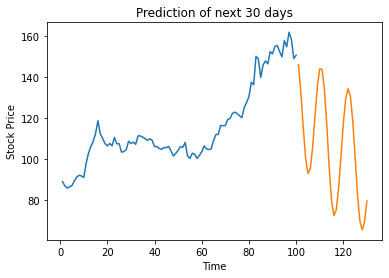

In [90]:
plt.plot(day_new,scaler.inverse_transform(y[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

The price of AMD will keep going up and down in the next 30 days in our prediction, so I dicide to sell all the AMD stocks for now.

## NVDA
I used 5 years of NVDA's historical data to predict the price.

In [91]:
import pandas as pd
NVDA = pd.read_csv('NVDA2.csv')
NVDA

,Date,Close/Last,Volume,Open,High,Low
0,12/5/16,22.97,60166480,22.50,23.15,22.25
1,12/6/16,23.35,49829600,23.05,23.43,22.89
2,12/7/16,23.77,48033280,23.21,23.83,23.03
3,12/8/16,23.37,38132036,23.80,24.16,23.26
4,12/9/16,22.96,38219984,23.55,23.57,22.68
...,...,...,...,...,...,...
1253,11/26/21,315.03,28306890,326.00,327.10,313.50
1254,11/29/21,333.76,45496400,323.66,334.12,320.36
1255,11/30/21,326.76,62206650,331.69,333.53,318.64
1256,12/1/21,314.35,48580200,332.19,332.89,313.80


In [92]:
y1 = NVDA.reset_index()['Close/Last']
y1

0        22.97
1        23.35
2        23.77
3        23.37
4        22.96
         ...  
1253    315.03
1254    333.76
1255    326.76
1256    314.35
1257    321.26
Name: Close/Last, Length: 1258, dtype: float64

Text(0, 0.5, 'NVDA Stock Price')

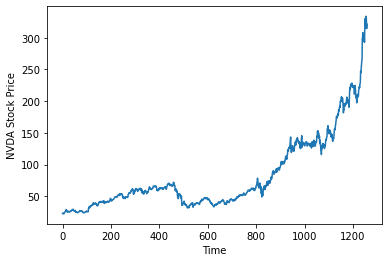

In [93]:
plt.plot(y1)
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')

In [94]:
scaler1 = MinMaxScaler(feature_range=(0,1))
y1 = scaler1.fit_transform(np.array(y1).reshape(-1,1))

In [95]:
training_size1 = int(len(y1)*0.65)
test_size1 = len(y1) - training_size1
train_data1,test_data1=y1[0:training_size1,:],y1[training_size1:len(y1),:1]

In [96]:
import numpy
def create_dataset1(dataset1, time_step=1):
    dataX1, dataY1 = [], []
    for u in range(len(dataset1)-time_step-1):
        b = dataset1[u:(u+time_step), 0]
        dataX1.append(b)
        dataY1.append(dataset1[u + time_step, 0])
    return numpy.array(dataX1), numpy.array(dataY1)

In [97]:
time_step = 100
X1_train, y1_train = create_dataset1(train_data1, time_step)
X1_test, y1test = create_dataset1(test_data1, time_step)

In [98]:
X1_train = X1_train.reshape(X1_train.shape[0],X1_train.shape[1] , 1)
X1_test = X1_test.reshape(X1_test.shape[0],X1_test.shape[1] , 1)

In [99]:
model1 = Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(X1_train,y1_train,validation_data=(X1_test,y1test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 238ms/step - loss: 0.0021 - val_loss: 0.0929
Epoch 2/100
12/12 [==============================] - 1s 108ms/step - loss: 6.0177e-04 - val_loss: 0.0475
Epoch 3/100
12/12 [==============================] - 1s 110ms/step - loss: 3.1743e-04 - val_loss: 0.0133
Epoch 4/100
12/12 [==============================] - 1s 105ms/step - loss: 1.6626e-04 - val_loss: 0.0026
Epoch 5/100
12/12 [==============================] - 1s 112ms/step - loss: 1.5840e-04 - val_loss: 0.0046
Epoch 6/100
12/12 [==============================] - 1s 108ms/step - loss: 1.4195e-04 - val_loss: 0.0046
Epoch 7/100
12/12 [==============================] - 1s 106ms/step - loss: 1.4285e-04 - val_loss: 0.0036
Epoch 8/100
12/12 [==============================] - 1s 106ms/step - loss: 1.4207e-04 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 1s 105ms/step - loss: 1.2538e-04 - val_loss: 0.0032
Epoch 10/100
12/12 [==============================] - 1s 10

12/12 [==============================] - 1s 99ms/step - loss: 7.6426e-05 - val_loss: 0.0021
Epoch 79/100
12/12 [==============================] - 1s 98ms/step - loss: 6.5201e-05 - val_loss: 0.0012
Epoch 80/100
12/12 [==============================] - 1s 99ms/step - loss: 5.5091e-05 - val_loss: 0.0016
Epoch 81/100
12/12 [==============================] - 1s 98ms/step - loss: 5.7015e-05 - val_loss: 0.0012
Epoch 82/100
12/12 [==============================] - 1s 98ms/step - loss: 5.7729e-05 - val_loss: 0.0035
Epoch 83/100
12/12 [==============================] - 1s 97ms/step - loss: 7.2843e-05 - val_loss: 6.5827e-04
Epoch 84/100
12/12 [==============================] - 1s 98ms/step - loss: 5.8102e-05 - val_loss: 0.0023
Epoch 85/100
12/12 [==============================] - 1s 97ms/step - loss: 5.1621e-05 - val_loss: 0.0023
Epoch 86/100
12/12 [==============================] - 1s 98ms/step - loss: 5.4773e-05 - val_loss: 0.0014
Epoch 87/100
12/12 [==============================] - 1s 97ms/st

In [100]:
train_predict1 = model1.predict(X1_train)
test_predict1 = model1.predict(X1_test)

In [101]:
train_predict1 = scaler1.inverse_transform(train_predict1)
test_predict1 = scaler1.inverse_transform(test_predict1)

In [102]:
math.sqrt(mean_squared_error(y1_train,train_predict1))

51.19155893368005

In [103]:
math.sqrt(mean_squared_error(y1test,test_predict1))

169.617031600234

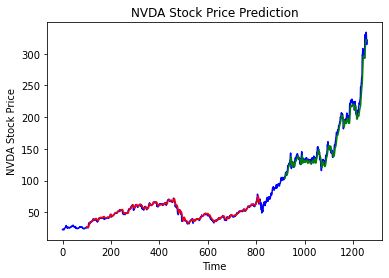

In [104]:
look_back=100
trainPredictPlot1 = numpy.empty_like(y1)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(train_predict1)+look_back, :] = train_predict1
testPredictPlot1 = numpy.empty_like(y1)
testPredictPlot1[:, :] = numpy.nan
testPredictPlot1[len(train_predict1)+(look_back*2)+1:len(y1)-1, :] = test_predict1
plt.plot(scaler1.inverse_transform(y1), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot1, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot1, color = 'green', label = 'Test Predict Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('NVDA Stock Price')
plt.show()

So the bule line is the actual stock price of NVDA, the red line is the training predict price and the green one is the testing predict price, we can see the preiction and the real value are really close so it looks like the model is pretty decent.

In [105]:
len(test_data1)

441

In [106]:
x1_input=test_data1[341:].reshape(1,-1)
x1_input.shape

(1, 100)

In [107]:
temp1_input=list(x1_input)
temp1_input=temp1_input[0].tolist()

In [108]:
from numpy import array
lst1_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp1_input)>100):
        x1_input=np.array(temp1_input[1:])
        print("{} day input {}".format(i,x1_input))
        x1_input=x1_input.reshape(1,-1)
        x1_input=x1_input.reshape((1, n_steps, 1))
        y1hat = model1.predict(x1_input, verbose=0)
        print("{} day output {}".format(i,y1hat))
        temp1_input.extend(y1hat[0].tolist())
        temp1_input=temp1_input[1:]
        lst1_output.extend(y1hat.tolist())
        i=i+1
    else:
        x1_input = x1_input.reshape((1, n_steps, 1))
        y1hat = model1.predict(x1_input, verbose=0)
        print(y1hat[0])
        temp1_input.extend(y1hat[0].tolist())
        print(len(temp1_input))
        lst1_output.extend(y1hat.tolist())
        i=i+1
        

[0.946693]
101
1 day input [0.53719168 0.51133736 0.53121788 0.5258222  0.5514517  0.55736125
 0.55620504 0.5477261  0.54496403 0.55443859 0.55954522 0.55431012
 0.56237153 0.56445915 0.57920092 0.59085946 0.5821557  0.57987539
 0.56834532 0.56073356 0.56734969 0.57643885 0.56879496 0.55299332
 0.53956835 0.56391316 0.59660843 0.63328623 0.6279869  0.6414761
 0.63681912 0.65506166 0.65673176 0.64700026 0.64879882 0.64735355
 0.66170992 0.65589671 0.64552287 0.64031989 0.64998715 0.63951696
 0.6424075  0.6455871  0.6424075  0.63142343 0.60614723 0.61041881
 0.63274024 0.65011562 0.63723664 0.62371531 0.59285072 0.5870054
 0.59339671 0.59423176 0.56179342 0.58488566 0.59288284 0.60492677
 0.59709018 0.59272225 0.59195144 0.60055884 0.62647739 0.63020298
 0.64176516 0.64394913 0.63794322 0.65686023 0.65795221 0.67208376
 0.72189748 0.71335432 0.72909173 0.74919707 0.75754753 0.77598279
 0.78230987 0.88518114 0.8836074  0.91739466 0.91267343 0.87419707
 0.90409815 0.90409815 0.89237539 0.8

8 day output [[0.91299945]]
9 day input [0.54496403 0.55443859 0.55954522 0.55431012 0.56237153 0.56445915
 0.57920092 0.59085946 0.5821557  0.57987539 0.56834532 0.56073356
 0.56734969 0.57643885 0.56879496 0.55299332 0.53956835 0.56391316
 0.59660843 0.63328623 0.6279869  0.6414761  0.63681912 0.65506166
 0.65673176 0.64700026 0.64879882 0.64735355 0.66170992 0.65589671
 0.64552287 0.64031989 0.64998715 0.63951696 0.6424075  0.6455871
 0.6424075  0.63142343 0.60614723 0.61041881 0.63274024 0.65011562
 0.63723664 0.62371531 0.59285072 0.5870054  0.59339671 0.59423176
 0.56179342 0.58488566 0.59288284 0.60492677 0.59709018 0.59272225
 0.59195144 0.60055884 0.62647739 0.63020298 0.64176516 0.64394913
 0.63794322 0.65686023 0.65795221 0.67208376 0.72189748 0.71335432
 0.72909173 0.74919707 0.75754753 0.77598279 0.78230987 0.88518114
 0.8836074  0.91739466 0.91267343 0.87419707 0.90409815 0.90409815
 0.89237539 0.89809224 0.86783787 0.94536871 0.98744219 0.95439363
 0.94764902 0.97745375 

16 day output [[0.861653]]
17 day input [0.5821557  0.57987539 0.56834532 0.56073356 0.56734969 0.57643885
 0.56879496 0.55299332 0.53956835 0.56391316 0.59660843 0.63328623
 0.6279869  0.6414761  0.63681912 0.65506166 0.65673176 0.64700026
 0.64879882 0.64735355 0.66170992 0.65589671 0.64552287 0.64031989
 0.64998715 0.63951696 0.6424075  0.6455871  0.6424075  0.63142343
 0.60614723 0.61041881 0.63274024 0.65011562 0.63723664 0.62371531
 0.59285072 0.5870054  0.59339671 0.59423176 0.56179342 0.58488566
 0.59288284 0.60492677 0.59709018 0.59272225 0.59195144 0.60055884
 0.62647739 0.63020298 0.64176516 0.64394913 0.63794322 0.65686023
 0.65795221 0.67208376 0.72189748 0.71335432 0.72909173 0.74919707
 0.75754753 0.77598279 0.78230987 0.88518114 0.8836074  0.91739466
 0.91267343 0.87419707 0.90409815 0.90409815 0.89237539 0.89809224
 0.86783787 0.94536871 0.98744219 0.95439363 0.94764902 0.97745375
 0.93984455 1.         0.97751799 0.93766059 0.95985355 0.946693
 0.94037426 0.93487012 0

24 day output [[0.7922295]]
25 day input [0.53956835 0.56391316 0.59660843 0.63328623 0.6279869  0.6414761
 0.63681912 0.65506166 0.65673176 0.64700026 0.64879882 0.64735355
 0.66170992 0.65589671 0.64552287 0.64031989 0.64998715 0.63951696
 0.6424075  0.6455871  0.6424075  0.63142343 0.60614723 0.61041881
 0.63274024 0.65011562 0.63723664 0.62371531 0.59285072 0.5870054
 0.59339671 0.59423176 0.56179342 0.58488566 0.59288284 0.60492677
 0.59709018 0.59272225 0.59195144 0.60055884 0.62647739 0.63020298
 0.64176516 0.64394913 0.63794322 0.65686023 0.65795221 0.67208376
 0.72189748 0.71335432 0.72909173 0.74919707 0.75754753 0.77598279
 0.78230987 0.88518114 0.8836074  0.91739466 0.91267343 0.87419707
 0.90409815 0.90409815 0.89237539 0.89809224 0.86783787 0.94536871
 0.98744219 0.95439363 0.94764902 0.97745375 0.93984455 1.
 0.97751799 0.93766059 0.95985355 0.946693   0.94037426 0.93487012
 0.93022919 0.9263345  0.92295641 0.91980445 0.91657585 0.91299945
 0.90886635 0.90404499 0.898482

In [109]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

Text(0, 0.5, 'Stock Price')

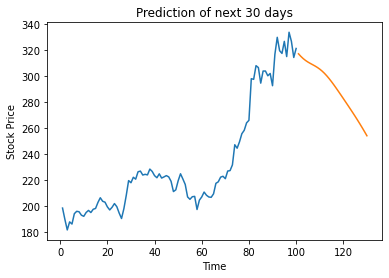

In [110]:
Y1=y1.tolist()
Y1.extend(lst1_output)
plt.plot(day_new,scaler1.inverse_transform(y1[1158:]))
plt.plot(day_pred,scaler1.inverse_transform(lst1_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

The price of NVDA will keep going down in the next 30 days in our prediction, so I dicide to sell all the AMD stocks.